In [1]:
###using PCA to speed up the algorithm

import pandas as pd
import numpy as np
dataset = pd.read_csv('All.csv')
dataset.shape

(36707, 80)

In [2]:

dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4
dataset = pd.DataFrame(dataset)


dataset.dropna(inplace = True)
print(dataset.shape)



(18982, 80)


In [3]:
X = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)   



In [6]:
X_train

array([[-0.25018235,  0.09622201, -0.76491485, ...,  0.38708063,
         0.59551312, -0.89680674],
       [-0.25018235,  0.09622201, -0.29333563, ...,  0.63061067,
         0.59551312, -0.89680674],
       [-0.24233362, -1.04886514, -0.05754602, ...,  0.22029082,
         0.14841039,  1.09297078],
       ...,
       [-0.25018235,  0.09622201,  2.30035007, ...,  0.54075017,
         0.35260042,  1.33899836],
       [-0.25018235, -1.04886514, -0.29333563, ...,  0.49510945,
         0.40379624,  1.33899836],
       [-0.25018235, -1.04886514, -0.52912524, ...,  0.23136345,
         0.59551312, -0.89680674]])

In [7]:


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [8]:
y_pred =np.round(y_pred,0)

from sklearn.metrics import accuracy_score
score1= accuracy_score(y_test, y_pred)
print(score1)



0.9357387411114038


In [9]:
X_train

array([[-0.25018235,  0.09622201, -0.76491485, ...,  0.38708063,
         0.59551312, -0.89680674],
       [-0.25018235,  0.09622201, -0.29333563, ...,  0.63061067,
         0.59551312, -0.89680674],
       [-0.24233362, -1.04886514, -0.05754602, ...,  0.22029082,
         0.14841039,  1.09297078],
       ...,
       [-0.25018235,  0.09622201,  2.30035007, ...,  0.54075017,
         0.35260042,  1.33899836],
       [-0.25018235, -1.04886514, -0.29333563, ...,  0.49510945,
         0.40379624,  1.33899836],
       [-0.25018235, -1.04886514, -0.52912524, ...,  0.23136345,
         0.59551312, -0.89680674]])

In [20]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=40)

In [21]:
pca.fit(X_train)

PCA(n_components=40)

In [22]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [23]:

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [24]:
y_pred =np.round(y_pred,0)
y_pred[:100]

from sklearn.metrics import accuracy_score
score2= accuracy_score(y_test, y_pred)
print(score2)


0.9096655254148012


In [25]:
print(score1)
print(score2)

0.9357387411114038
0.9096655254148012


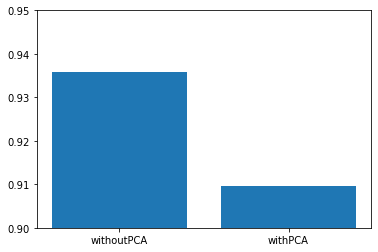

In [26]:
from matplotlib import pyplot as plt 
x =['withoutPCA','withPCA']
y = [score1, score2]
plt.ylim(0.90, 0.95)
plt.bar(x,y)
plt.show()